Sample oil price data:                             date                             event      price
0  Sun, 01 Jan 2023 00:00:00 GMT  Conflict in Oil-Producing Region  87.961164
1  Mon, 02 Jan 2023 00:00:00 GMT                              None  52.175006
2  Tue, 03 Jan 2023 00:00:00 GMT                Political Decision  95.363198
3  Wed, 04 Jan 2023 00:00:00 GMT                              None  61.674831
4  Thu, 05 Jan 2023 00:00:00 GMT  Conflict in Oil-Producing Region  87.619360


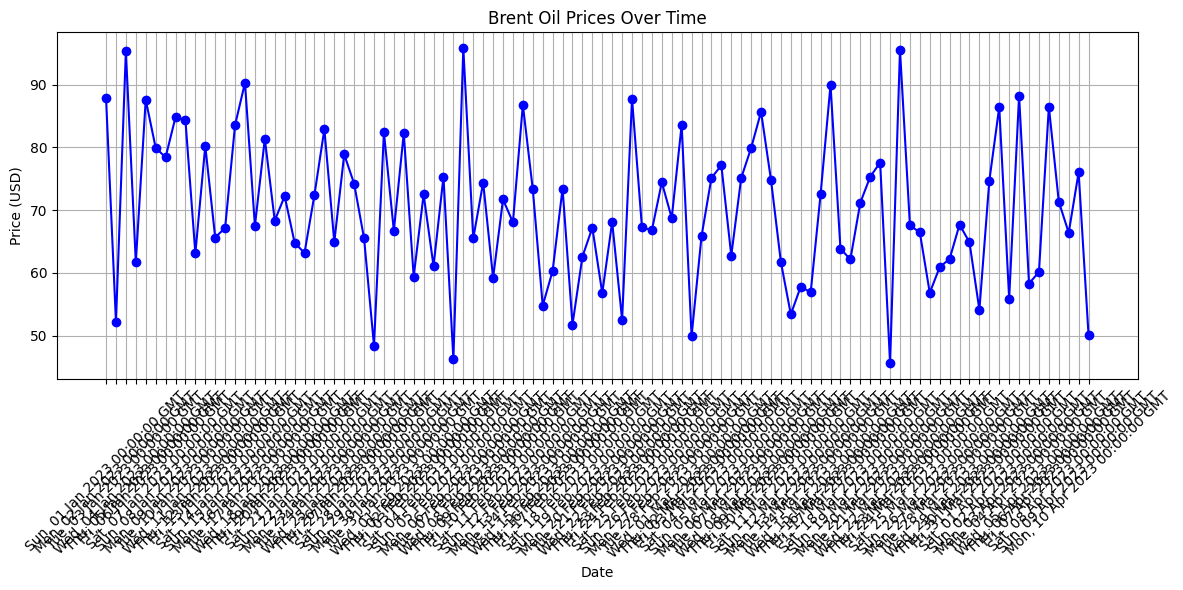

Analysis Metrics: {'MAE': 0.56, 'RMSE': 0.99, 'Volatility': 10.97}


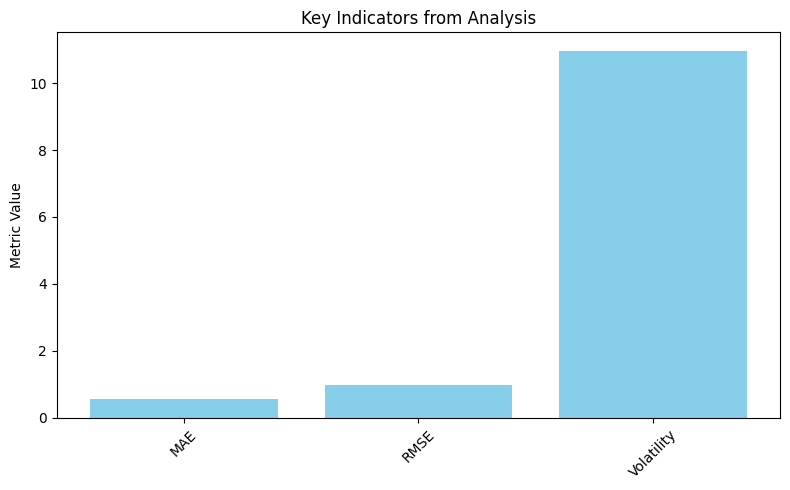

In [2]:
# dashboard_interaction.ipynb
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the base URL of the API
BASE_URL = "http://127.0.0.1:5000/api"

# Function to get Brent oil prices within a date range
def get_oil_prices(start_date=None, end_date=None, event=None):
    params = {}
    if start_date:
        params["start_date"] = start_date
    if end_date:
        params["end_date"] = end_date
    if event:
        params["event"] = event  # Filter by event if provided
    response = requests.get(f"{BASE_URL}/oil_prices", params=params)
    data = response.json()
    return pd.DataFrame(data)

# Function to get analysis metrics like RMSE and MAE
def get_metrics():
    response = requests.get(f"{BASE_URL}/metrics")
    return response.json()

# Function to visualize oil prices
def plot_oil_prices(oil_data):
    plt.figure(figsize=(12, 6))
    plt.plot(oil_data["date"], oil_data["price"], marker='o', linestyle='-', color='b')
    plt.title("Brent Oil Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Function to visualize analysis metrics
def plot_metrics(metrics):
    plt.figure(figsize=(8, 5))
    plt.bar(metrics.keys(), metrics.values(), color='skyblue')
    plt.title("Key Indicators from Analysis")
    plt.ylabel("Metric Value")
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# Retrieve oil prices for a specific date range
start_date = "2023-01-01"
end_date = "2023-04-10"
event = None  # You can set this to "Political Decision", "Conflict in Oil-Producing Region", etc., to filter by event
oil_data = get_oil_prices(start_date=start_date, end_date=end_date, event=event)
print("Sample oil price data:", oil_data.head())

# Plot oil prices
plot_oil_prices(oil_data)

# Retrieve and print metrics
metrics = get_metrics()
print("Analysis Metrics:", metrics)

# Display key indicators as a bar plot
plot_metrics(metrics)
